## 신경망 모델 훈련

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [7]:
print(train_scaled.shape)

(48000, 28, 28)


In [5]:
print(np.unique(train_target)) #총 10개 target

[0 1 2 3 4 5 6 7 8 9]


In [12]:
def model_fn(a_layer=None):
    model = keras.Sequential() #신경 심층망 만들기
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    
    if a_layer : #은닉층 하나 추가하기
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation= 'softmax'))
    return model

In [13]:
model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose =0)

In [15]:
print(history.history.keys()) #history에는 loss와 accuracy가 포함되어있음

dict_keys(['loss', 'accuracy'])


### epoch에 따른 loss의 변화

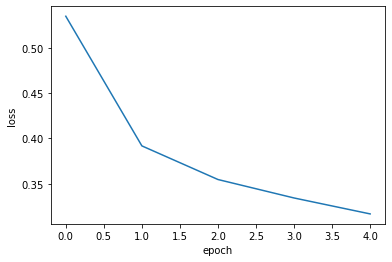

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### epoch에 따른 accuracy의 변화

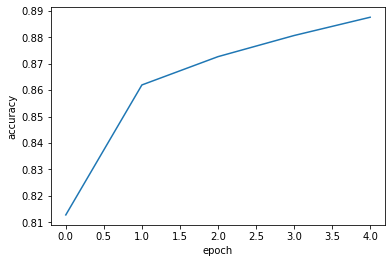

In [19]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### epoch 를 늘려 다시 실행

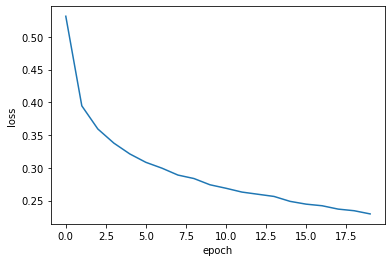

In [20]:
model = model_fn()
model.compile(loss ='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 검증세트에 대한 accuracy와 loss도 비교해야함! 과대 적합과 과소적합을 막기위해

In [22]:
model = model_fn()
model.compile(loss ='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0, validation_data = (val_scaled, val_target))

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


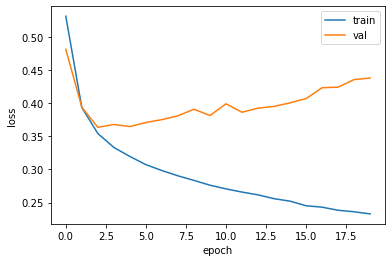

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#### 옵티마이저 하이퍼 파라미터를 조정하여 과대적합을 완화시키기

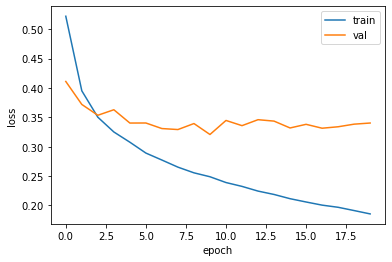

In [28]:
model = model_fn()
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0, validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 신경망 대표적인 규제방법 : Dropout

훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다

특정 뉴런에게 과대하게 의존하는 것을 막을 수 있고 모든 입력에 대해 주의를 기울이게 된다

In [29]:
model = model_fn(keras.layers.Dropout(0.3)) #30%정도를 dropout 시킴

In [30]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


훈련이 끝난 뒤에나 평가, 예측 수행할 떄는 드롭아웃을 적용하지 말아야한다. 훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있기 때문이다. 그러나 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 안흔다. 그래서 맘 편하게 검증점수를 계산할수 있다

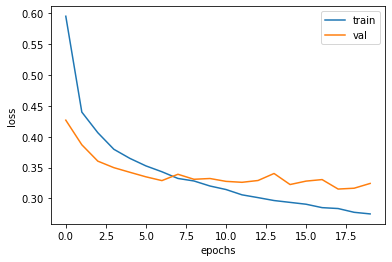

In [31]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

### 모델의 저장과 복원

에포크 횟수를 10으로 지정하고 다시 모델 훈련시키기

In [32]:
#Dropout 먼저하기
model = model_fn(keras.layers.Dropout(0.3))

#epoch횟수 10개로 지정
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history =model.fit(train_scaled, train_target, epochs = 10, verbose =0, validation_data=(val_scaled, val_target))

케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공한다.

In [34]:
model.save_weights('model-weights.h5')

모델 구조와 모델 파라미터를 함께 저장하는 save()메서드도 제공한다.

In [35]:
model.save('model-whole.h5')

In [37]:
!dir -al *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2261-1D0D

 C:\Users\queenSSH\모두의 딥러닝 디렉터리


 C:\Users\queenSSH\모두의 딥러닝 디렉터리

2021-09-02  오후 10:18           332,480 model-weights.h5
2021-09-02  오후 10:18           981,736 model-whole.h5
               2개 파일           1,314,216 바이트
               0개 디렉터리  207,283,265,536 바이트 남음


### 두가지 실험을 해보자

1. 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

2. model-whole.h5 파일에서 아예 새로운 모델을 만들어 바로 사용

save_weights() 와 쌍을 이루는 load_weights()

#### np.argmax 함수는 가장 큰값의 인덱스를 반환해준다

#### axis = -1은 배열의 마지막 차원을 따라 최댓값을 고른다 (axis =1, 열을 따라 각행의 최댓값의 인덱스 선택, axis =0, 각 열의 최댓값 인덱스 선택)

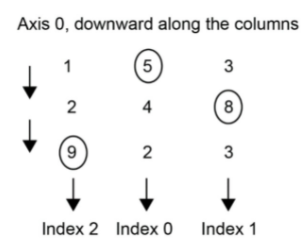

In [43]:
from IPython.display import Image
size = 300,300
image1 = Image('axis0.png')
image2 = Image('axis1.png')
image1

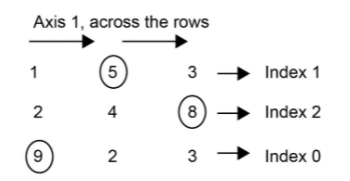

In [44]:
image2

In [39]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis =-1)
print(np.mean(val_labels == val_target))

0.886


#### load_model()함수와 검증 세트의 정확도 출력

In [45]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 464us/step - loss: 0.3208 - accuracy: 0.8860


[0.32082775235176086, 0.8859999775886536]

### 콜백

콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들이다

ModelCheckpoint클래스의 객체 checkpoint_cb를 만든 후 fit() 메서드의 callbacks매개변수에 리스트로 감싸서 전달

In [46]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs = 20, verbose =0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb])

In [49]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 501us/step - loss: 0.3252 - accuracy: 0.8838


[0.32516103982925415, 0.8838333487510681]

### 과대 적합이 되기 전에 훈련을 미리 중지하는 것을 조기종료 (early stopping)이라하며 딥러닝에 많이 사용

콜백의 patience매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다

예를들어 patience =2일경우 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지

Early Stopping 콜백을 ModelCheckpoint 콜백과 함께 사용시 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음

In [50]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights =True)

history = model.fit(train_scaled, train_target, epochs = 20, verbose =0, 
                    validation_data = (val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

#### 언제 멈췄는지

In [51]:
print(early_stopping_cb.stopped_epoch)

15


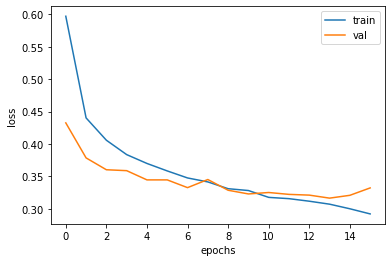

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

In [53]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 455us/step - loss: 0.3165 - accuracy: 0.8842


[0.31650155782699585, 0.8841666579246521]